## Project Overview

Use of Social media has been increasing day by day and also hate Speech is also increasing along with number of users. So it is tough challenge for companies to monitor each and every tweet of users, so we are developing a machine learning model to identify the hate speech tweets automatically which saves lot of resources for companies

Please upvote on [kaggle](https://www.kaggle.com/umangtank/twitter-sentiment-analysis) and share if this helps you!! Also, feel free to fork this kernel to play around with the code and test it for yourself.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("hate speeech.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**Observations:**
* There are `0` Null value in data

In [5]:
df.drop("id",axis = 1,inplace=True)

In [6]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
#distributions
df_Stat=df[['label','tweet']].groupby('label').count().reset_index()
df_Stat.columns=['label','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,label,count,percentage
0,0,29720,92.98542
1,1,2242,7.01458


----

In [8]:
df['length'] = df['tweet'].apply(len)
df.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


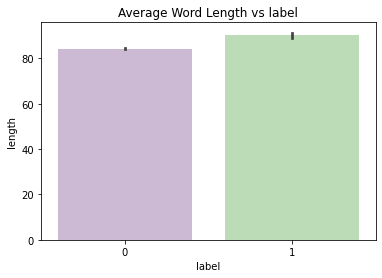

In [9]:
#Exploratory Data Analysis

sns.barplot('label','length',data = df,palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

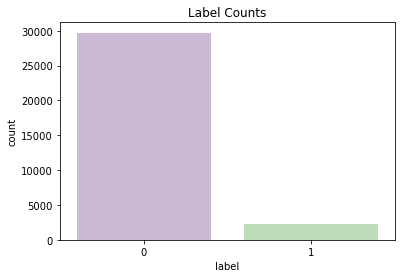

In [10]:
sns.countplot(x= 'label',data = df,palette="PRGn")
plt.title('Label Counts')
plt.show()

**Character count**

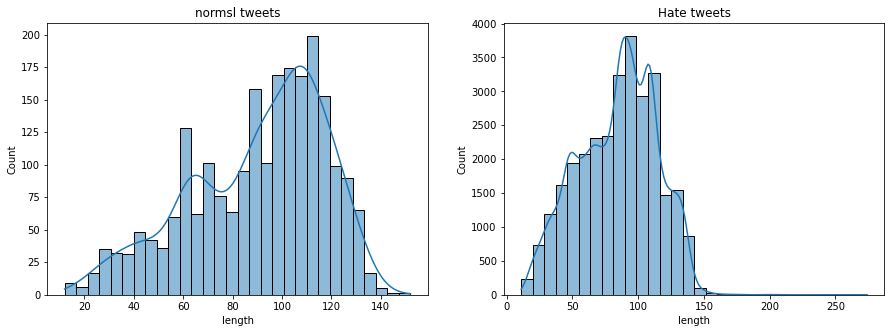

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(df[df["label"] == 1]["length"],bins = 30,ax = ax1, kde=True).set(title = "normsl tweets")
sns.histplot(df[df["label"] == 0]["length"],bins = 30,ax = ax2, kde = True).set(title = "Hate tweets")
plt.show()

**The distribution of both seems to be almost same. 90 to 120 characters in a tweet are the most common among both.**

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Preprocessing the tweet column

In [13]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def process_tweet(tweet):
    tweet =  " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())
    tweet = nltk.word_tokenize(tweet)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in tweet]
    words = [word for word in stem if word not in stopwords.words('english')]
    tweet = " ".join(words)
    
    return tweet

df["clean_tweet"] = df["tweet"].apply(process_tweet)
df.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,father dysfunct selfish drag hi kid hi dysfunc...
1,0,@user @user thanks for #lyft credit i can't us...,122,thank lyft credit use caus offer wheelchair va...
2,0,bihday your majesty,21,bihday majesti
3,0,#model i love u take with u all the time in ...,86,model love u take u time ur
4,0,factsguide: society now #motivation,39,factsguid societi motiv


**Most frequent Word in tweet**

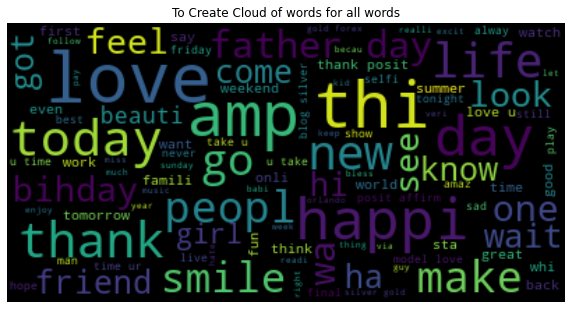

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df.clean_tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all words")
plt.show()

In [15]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(df["clean_tweet"])

<IPython.core.display.Javascript object>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df["label"].unique()

array([0, 1], dtype=int64)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,df["label"],test_size = 0.2,random_state = 42)

In [21]:
x_train = X_train.toarray()
x_test = X_test.toarray()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score


clf_A = AdaBoostClassifier()

clf_B = MultinomialNB()
clf_C = GaussianNB()
clfs = [clf_A,clf_B,clf_C]

In [23]:
df_score = pd.DataFrame(index=None, columns=['model','recall_score','precision_score','f1_score','accuracy-score'])
for clf in clfs:
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    score1 = recall_score(y_test,pred)
    score2 = precision_score(y_test,pred)
    score3 = f1_score(y_test,pred)
    acuracy_score = accuracy_score(y_test,pred)
  
    df_score = df_score.append(pd.Series({
                "model" : clf.__class__.__name__,
                "recall_score" : score1,
                "precision_score" : score2,
                "f1_score" : score3,
                "accuracy-score" : acuracy_score}),ignore_index = True)

df_score

,model,recall_score,precision_score,f1_score,accuracy-score
0,AdaBoostClassifier,0.379386,0.762115,0.506589,0.947286
1,MultinomialNB,0.151316,1.000000,0.262857,0.939465
2,GaussianNB,0.677632,0.225547,0.338445,0.811043


In [44]:
with open('model.pkl', 'wb') as fid:
    pickle.dump(clf_A, fid)

<IPython.core.display.Javascript object>

In [45]:
pickle.dump(vectorizer, open('transform.pkl', 'wb'))

<IPython.core.display.Javascript object>